<a href="https://colab.research.google.com/github/MaulidinZakaria/16_MaulidinZakaria/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **D. LATIHAN PRAKTIKUM**

#### 1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colabterhubung dengan Github Anda, buat notebook baru dan beri nama “Week11.ipynb”. Kemudian import beberapa library dan akses folder yang ada di Drive Anda dengan cara sebagai berikut.

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### 2. Implementasikan 6 metode template matching pada OpenCV dengan menggunakan gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.

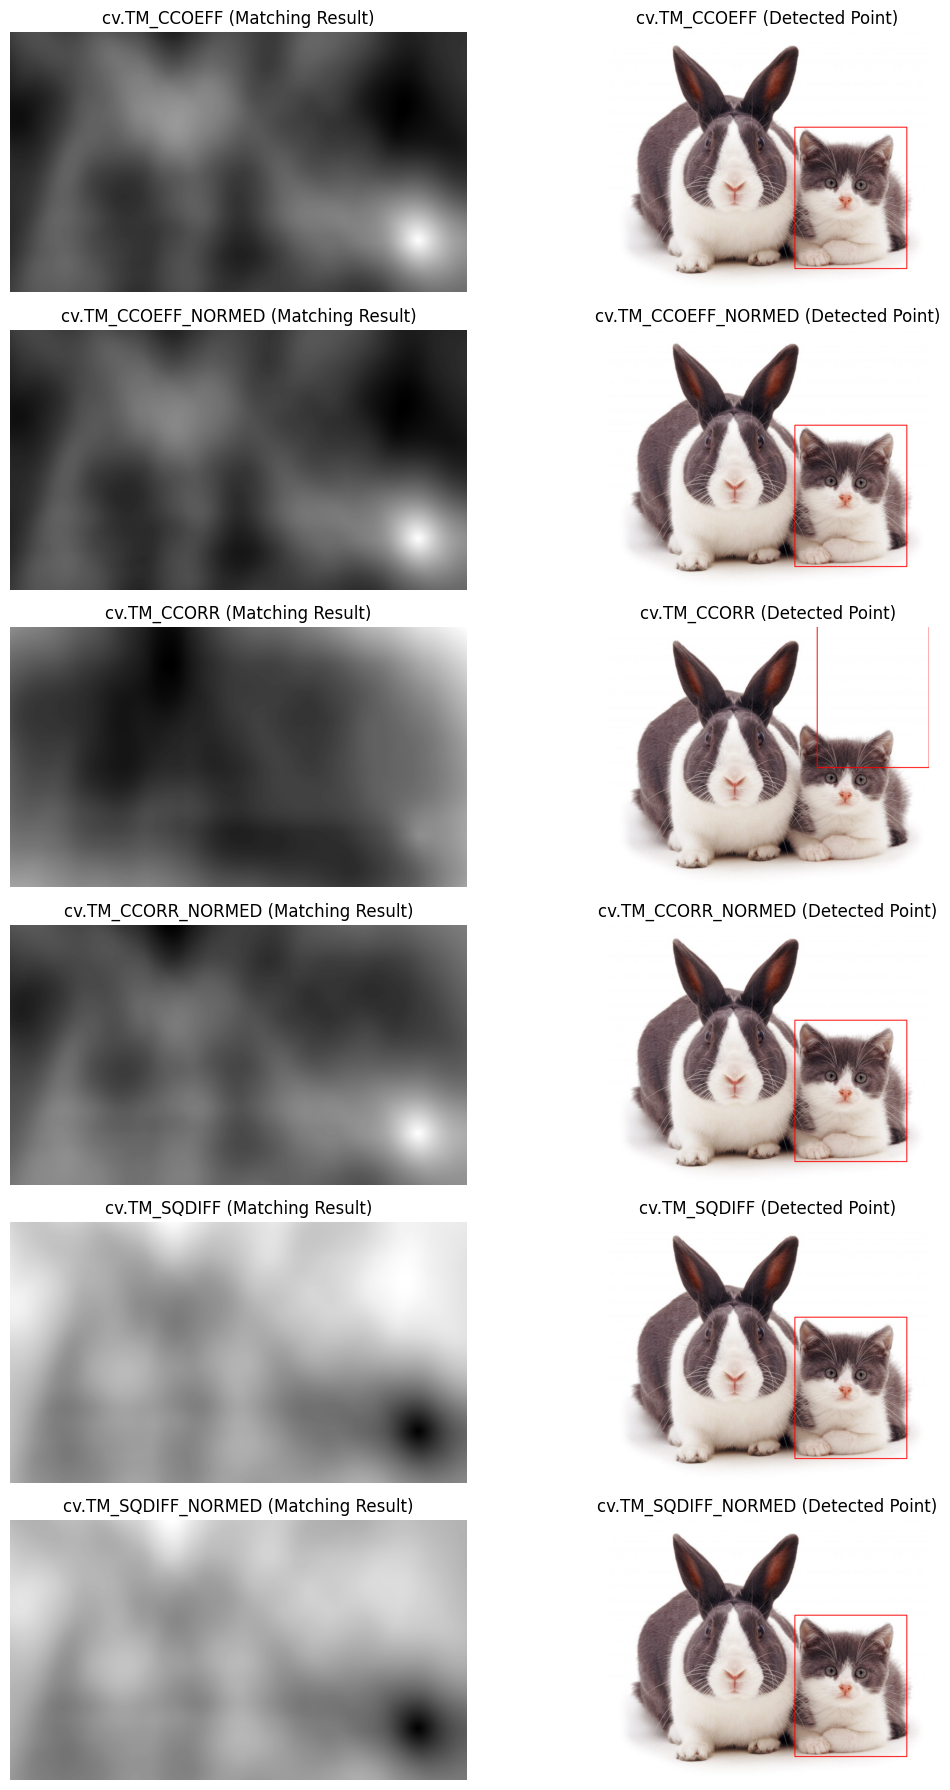

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Load the main image and template image
img = cv.imread('/content/drive/MyDrive/Images/Object Detection/cats_and_bunnies.jpg')  # Main image (grayscale)
template = cv.imread('/content/drive/MyDrive/Images/Object Detection/cat2_templatejpg.jpg')  # Template image (grayscale)
w, h = template.shape[1], template.shape[0]  # Get the width and height of the template

# List of methods to use for template matching
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
           'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

# Create a dictionary to store the results for each method
results = {}
correlation_results = {}

for method_name in methods:
    # Apply the template matching method
    method = eval(method_name)
    res = cv.matchTemplate(img, template, method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    # For methods TM_SQDIFF and TM_SQDIFF_NORMED, we use min_val
    if method_name in ['cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']:
        top_left = min_loc
    else:
        top_left = max_loc

    # Bottom-right corner of the matched area
    bottom_right = (top_left[0] + w, top_left[1] + h)

    # Draw rectangle around matched region
    img_result = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # Convert to color image for rectangle
    cv.rectangle(img_result, top_left, bottom_right, (255, 0, 0), 2)

    # Save the result in the dictionary
    results[method_name] = img_result
    correlation_results[method_name] = res

# Display the results in a 6x2 grid: 6 methods for matching and correlation result
fig, axes = plt.subplots(6, 2, figsize=(12, 18))

for i, (method_name, img_res) in enumerate(results.items()):

    # Display correlation result (grayscale)
    axes[i, 0].imshow(correlation_results[method_name], cmap='gray')
    axes[i, 0].set_title(f'{method_name} (Matching Result)')
    axes[i, 0].axis('off')

    # Display matched result
    axes[i, 1].imshow(img_res)
    axes[i, 1].set_title(f'{method_name} (Detected Point)')
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()


#### 3. Implementasikan konsep template matching tanpa menggunakan library OpenCV untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan bahrain-template.jpg sebagai citra template, sehingga menghasilkan output sebagai berikut:

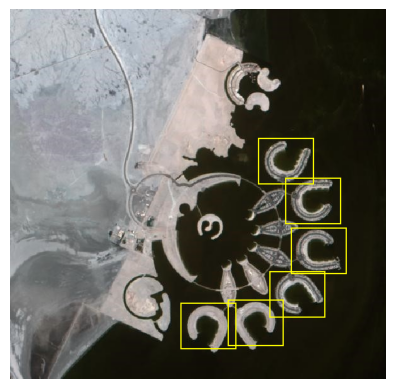

In [ ]:
from PIL import Image, ImageDraw


def match_and_suppress(image, template, threshold=0.5, overlap_thresh=0.5):
  h_img, w_img = image.shape[:2]
  h_temp, w_temp = template.shape[:2]

  # Mencari kecocokan berdasarkan korelasi
  matches = [
      (x, y, np.corrcoef(image[y:y+h_temp, x:x+w_temp].flatten(), template.flatten())[0, 1])
      for y in range(h_img - h_temp + 1) for x in range(w_img - w_temp + 1)
      if np.corrcoef(image[y:y+h_temp, x:x+w_temp].flatten(), template.flatten())[0, 1] >= threshold
  ]

  # Mengurutkan kecocokan berdasarkan nilai korelasi tertinggi
  matches.sort(key=lambda x: x[2], reverse=True)

  # Melakukan filter terhadap nilai korelasi yang saling tumpang tindih
  final_matches, suppressed = [], [False] * len(matches)
  for i, (x1, y1, _) in enumerate(matches):
      if suppressed[i]:
          continue
      final_matches.append((x1, y1))
      for j, (x2, y2, _) in enumerate(matches[i+1:], start=i+1):
        if not suppressed[j]:
          # Menghitung area yang bertindihan
          overlap_x = max(0, min(x1 + w_temp, x2 + w_temp) - max(x1, x2))
          overlap_y = max(0, min(y1 + h_temp, y2 + h_temp) - max(y1, y2))
          overlap_area = overlap_x * overlap_y
          if overlap_area / float(2 * w_temp * h_temp - overlap_area) > overlap_thresh:
              suppressed[j] = True

  return final_matches

def draw_matches(image, matches, template_size):
    img_pil = Image.fromarray(image)
    draw = ImageDraw.Draw(img_pil)
    for (x, y) in matches:
        draw.rectangle([x, y, x + template_size[1], y + template_size[0]], outline="yellow", width=2)
    return img_pil

input_image = cv.imread('/content/drive/MyDrive/Images/Object Detection/bahrain.jpg')
template_image = cv.imread('/content/drive/MyDrive/Images/Object Detection/bahrain-template.jpg')

matches = match_and_suppress(input_image, template_image, threshold=0.45)
result_image = draw_matches(input_image, matches, template_image.shape[:2])

plt.imshow(result_image)
plt.axis('off')
plt.show()

#### 4. Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg, sehingga menghasilkan luaran sebagai berikut:


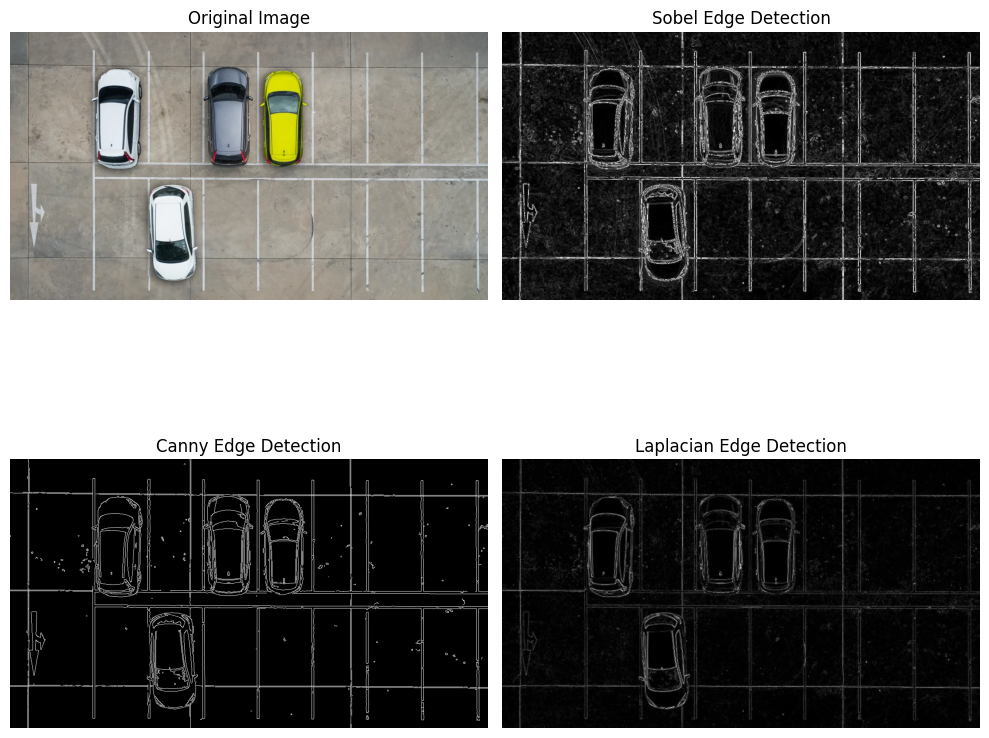

In [ ]:
# Fungsi untuk membaca dan menampilkan gambar
def load_image(image_path):
    return cv.imread(image_path)

# Fungsi untuk Sobel Edge Detection
def sobel_edge_detection(img):
    # Menghitung gradien pada sumbu X dan Y dengan Sobel operator
    sobel_x = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)  # Derivative in X direction
    sobel_y = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)  # Derivative in Y direction

    # Menghitung magnitude dari gradien
    sobel_edges = cv.magnitude(sobel_x, sobel_y)
    return np.uint8(np.absolute(sobel_edges))

# Fungsi untuk Canny Edge Detection
def canny_edge_detection(img, low_threshold=100, high_threshold=200):
    return cv.Canny(img, low_threshold, high_threshold)

# Fungsi untuk Laplacian Edge Detection
def laplacian_edge_detection(img):
    # Menghitung Laplacian dan mengubah tipe data ke uint8
    laplacian = cv.Laplacian(img, cv.CV_64F)

    # Ambil nilai absolut dan konversi ke uint8 untuk menampilkan dengan benar
    laplacian = np.uint8(np.absolute(laplacian))
    return laplacian

# Load gambar car-park
img = load_image('/content/drive/MyDrive/Images/Object Detection/car-park.jpg')

# Konversi ke grayscale
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Terapkan Sobel Edge Detection
sobel_edges = sobel_edge_detection(gray_img)

# Terapkan Canny Edge Detection
canny_edges = canny_edge_detection(gray_img)

# Terapkan Laplacian Edge Detection
laplacian_edges = laplacian_edge_detection(gray_img)

# Visualisasi hasil
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Gambar gambar asli
axes[0, 0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axes[0, 0].set_title("Original Image")
axes[0, 0].axis('off')

# Gambar Sobel Edge Detection
axes[0, 1].imshow(sobel_edges, cmap='gray')
axes[0, 1].set_title("Sobel Edge Detection")
axes[0, 1].axis('off')

# Gambar Canny Edge Detection
axes[1, 0].imshow(canny_edges, cmap='gray')
axes[1, 0].set_title("Canny Edge Detection")
axes[1, 0].axis('off')

# Gambar Laplacian Edge Detection
axes[1, 1].imshow(laplacian_edges, cmap='gray')
axes[1, 1].set_title("Laplacian Edge Detection")
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()


#### 5. Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada  OpenCV dengan menggunakan gambar chess-board.jpg, sehingga menghasilkan luaran sebagai berikut:


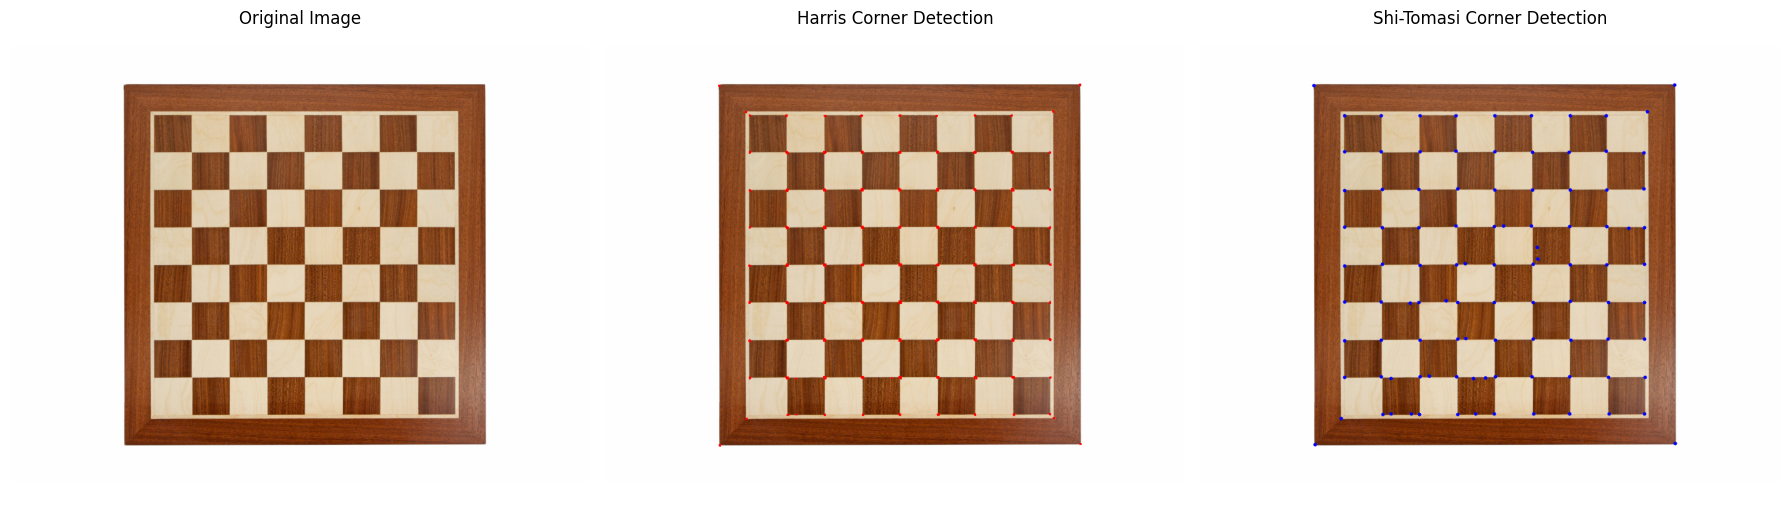

In [ ]:
# Fungsi untuk membaca dan menampilkan gambar
def load_image(image_path):
    return cv.imread(image_path)

# Fungsi untuk Harris Corner Detection
def harris_corner_detection(img, block_size=2, ksize=3, k=0.04):
    # Mengonversi gambar ke grayscale
    gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Menghitung respons corner menggunakan Harris corner detection
    gray_img = np.float32(gray_img)
    dst = cv.cornerHarris(gray_img, block_size, ksize, k)

    # Menandai sudut dengan warna hijau pada gambar asli
    dst = cv.dilate(dst, None)  # Dapatkan titik sudut yang lebih jelas
    img_with_corners = img.copy()
    img_with_corners[dst > 0.01 * dst.max()] = [0, 0, 255]  # Menandai dengan warna hijau

    return img_with_corners, dst

# Fungsi untuk Shi-Tomasi Corner Detection
def shi_tomasi_corner_detection(img, max_corners=100, quality_level=0.01, min_distance=10):
    # Mengonversi gambar ke grayscale
    gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Menghitung sudut menggunakan Shi-Tomasi
    corners = cv.goodFeaturesToTrack(gray_img, max_corners, quality_level, min_distance)

    # Menandai sudut dengan lingkaran merah pada gambar
    img_with_corners = img.copy()
    if corners is not None:
        for corner in corners:
            x, y = corner.ravel()
            cv.circle(img_with_corners, (int(x), int(y)), 3, (255, 0, 0), -1)

    return img_with_corners

# Load gambar chess-board
img = load_image('/content/drive/MyDrive/Images/Object Detection/chess-board.jpg')

# Terapkan Harris Corner Detection
harris_corners_img, harris_corners = harris_corner_detection(img)

# Terapkan Shi-Tomasi Corner Detection
shi_tomasi_corners_img = shi_tomasi_corner_detection(img)

# Visualisasi hasil
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Gambar gambar asli
axes[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis('off')

# Gambar Harris Corner Detection
axes[1].imshow(cv.cvtColor(harris_corners_img, cv.COLOR_BGR2RGB))
axes[1].set_title("Harris Corner Detection")
axes[1].axis('off')

# Gambar Shi-Tomasi Corner Detection
axes[2].imshow(cv.cvtColor(shi_tomasi_corners_img, cv.COLOR_BGR2RGB))
axes[2].set_title("Shi-Tomasi Corner Detection")
axes[2].axis('off')

plt.tight_layout()
plt.show()


#### 6. Implementasikan metode Hough Transform pada OpenCV dengan menggunakan gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan teori, sehingga menghasilkan luaran sebagai berikut:

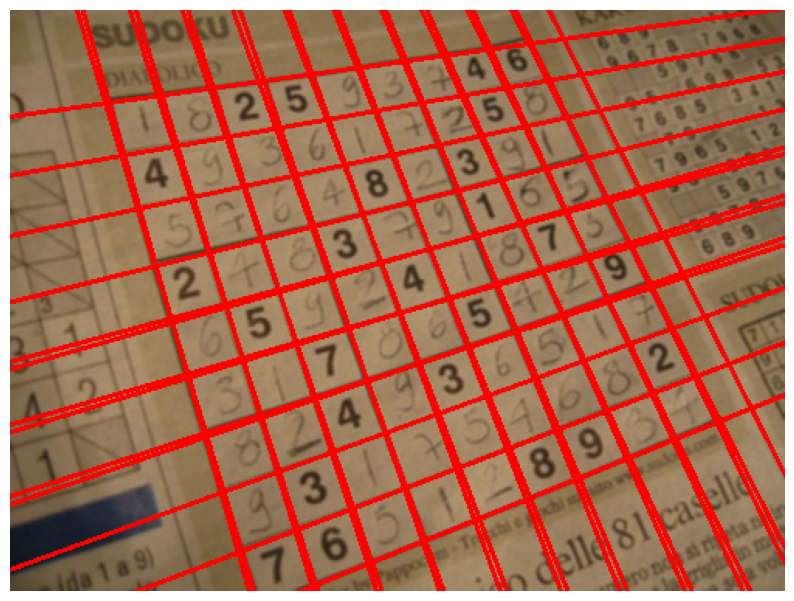

In [ ]:
sudoku = cv.imread('/content/drive/MyDrive/Images/Object Detection/sudoku.jpg')

gray_sudoku = cv.cvtColor(sudoku, cv.COLOR_BGR2GRAY)

edges = cv.Canny(
    gray_sudoku,
    50,
    150,
    apertureSize=3
  )

dilated_edges = cv.dilate(edges, cv.getStructuringElement(cv.MORPH_RECT, (4, 3)))
eroded_edges = cv.erode(dilated_edges, cv.getStructuringElement(cv.MORPH_RECT, (4, 4)))

lines = cv.HoughLines(
    eroded_edges,
    1,
    np.pi / 180,
    threshold=255
  )

for line in lines:
  r, theta = line[0]

  a, b = np.cos(theta), np.sin(theta)
  x0, y0 = a * r, b * r
  x1, y1 = int(x0 + 1000 * (-b)), int(y0 + 1000 * (a))
  x2, y2 = int(x0 - 1000 * (-b)), int(y0 - 1000 * (a))

  cv.line(sudoku, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(sudoku, cv.COLOR_BGR2RGB)), plt.axis('off')
plt.show()

#### 7. Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan menggunakan gambar laptop.jpg, sehingga menghasilkan luaran sebagai berikut:

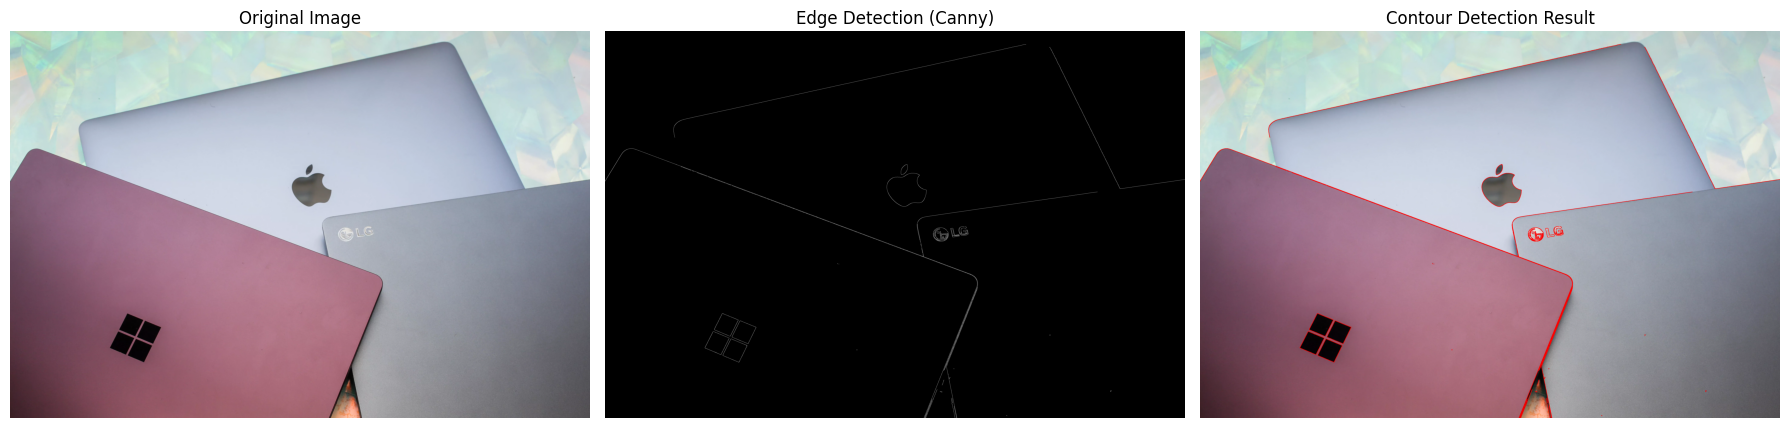

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

# Load dan konversi gambar ke grayscale
def load_image(image_path):
    img = cv.imread(image_path)
    gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    return img, gray_img

# Fungsi untuk melakukan deteksi kontur
def contour_detection(img, gray_img, method='canny'):
    # Langkah untuk thresholding atau deteksi tepi
    if method == 'canny':
        edges = cv.Canny(gray_img, 100, 200)  # Deteksi tepi menggunakan Canny
    else:
        _, edges = cv.threshold(gray_img, 127, 255, cv.THRESH_BINARY)  # Thresholding sederhana

    # Deteksi kontur pada gambar tepi
    contours, _ = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    # Gambar kontur pada gambar asli
    img_with_contours = img.copy()
    cv.drawContours(img_with_contours, contours, -1, (0, 0, 255), 2)  # Kontur hijau dengan ketebalan 2

    return img_with_contours, edges

# Load gambar laptop
img, gray_img = load_image('/content/drive/MyDrive/Images/Object Detection/laptop.jpg')  # Ganti dengan path gambar laptop Anda

# Terapkan deteksi kontur
img_with_contours, edges = contour_detection(img, gray_img, method='canny')

# Visualisasi hasil
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Tampilkan gambar asli
axes[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis('off')

# Tampilkan hasil deteksi tepi
axes[1].imshow(edges, cmap='gray')
axes[1].set_title("Edge Detection (Canny)")
axes[1].axis('off')

# Tampilkan hasil deteksi kontur
axes[2].imshow(cv.cvtColor(img_with_contours, cv.COLOR_BGR2RGB))
axes[2].set_title("Contour Detection Result")
axes[2].axis('off')

plt.tight_layout()
plt.show()


# **E. Pengayaan Materi KTP**

#### 1. Siapkan file dataset, contoh pada praktik ini menggunakan Maftuchin Tuban

#### 2. Muat 2 library berikut sebagai tahapan persiapan


In [ ]:
import cv2
import os
from google.colab.patches import cv2_imshow

#### 3. Tambahkan kode lokalisasi dataset dan lakukan pembacaan file name di dalam direktori dataset tersebut

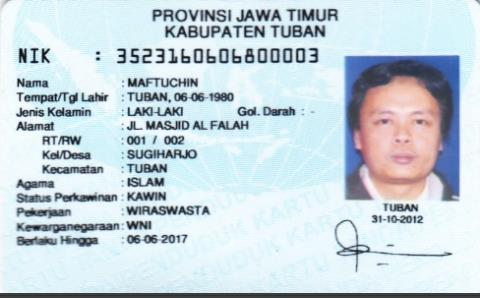

In [ ]:
path_img = "/content/drive/MyDrive/Images/ktp_maftuchin.jpg"

src = cv2.imread(path_img)
blurred = src.copy()
gray = blurred.copy()

cv2_imshow(src)

#### 4. Masih pada looping file direktori, terapkan Gaussian Blur untuk setiap file supaya noise pickle dapat direduksi


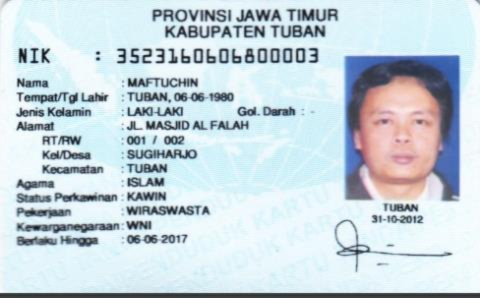

In [ ]:
for i in range(10):
  blurred = cv2.GaussianBlur(src, (5, 5), 0.5)

cv2_imshow(blurred)

#### 5. Lakukan konversi grayscale untuk setiap hasil citra yang tereduksi noise dan lanjutkan dengan binerisasi citra (thresholding)

169.0 (298, 480)


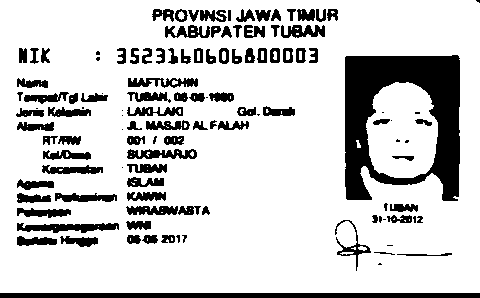

In [ ]:
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

print(ret, bw.shape)
cv2_imshow(bw)

#### 6. Terapkan morfologi untuk setiap citra yang telah mengalami binerisasi supaya setiap karakter atau obyek tidak berhimpitan.

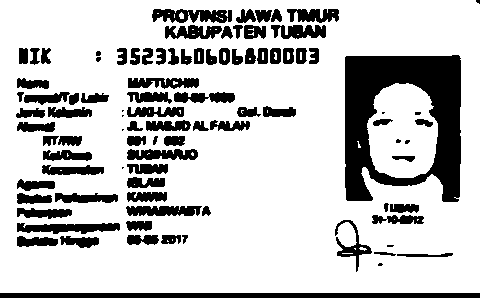

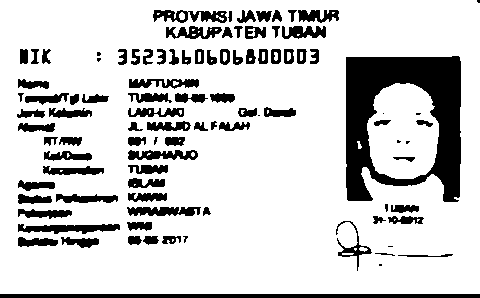

In [ ]:
kernel = cv.getStructuringElement(cv.MORPH_CROSS, (1,1))

# Operasi pembukaan (opening) untuk memperjelas batas antar objek
opened_img = cv.morphologyEx(bw, cv.MORPH_OPEN, kernel)

cv2_imshow(opened_img)

#### 7. Terapkan ekstraksi kontur untuk untuk mendapatkan semua kontur setiap karakter/obyek. Kontur harus diseleksi berdasarkan ukuran dan rasio sebuah karakter. Karakter/obyek di dalam KTP ini bervariasi ukuran dan rasionya, sehingga setiap karakter/obyek perlu penanganan yang berbeda. Contoh pada praktik ini berfokus pada karakter yang seukuran dengan NIK. Jika hasil ekstraksi kontur memperlihatkan hasil lain yaitu karakter lain terdeteksi, hal tersebut wajar karena perlu optimize code dan preprocessing yang lebih baik (karena hasil akuisisi setiap citra dapat berbeda).


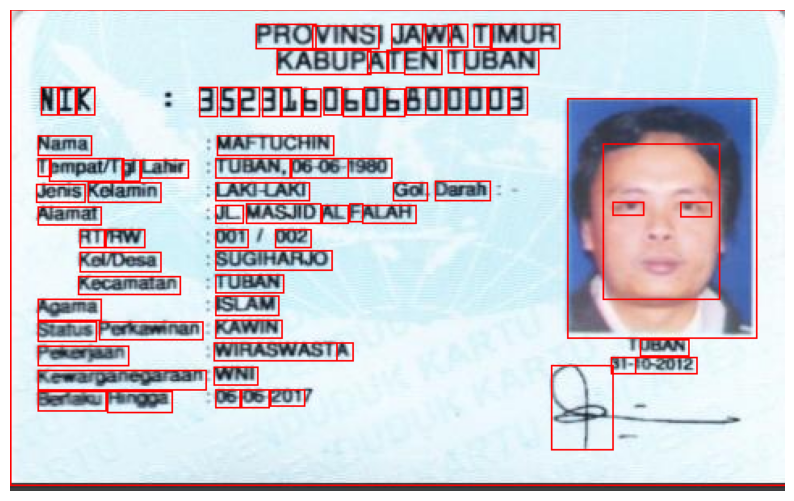

In [ ]:
!pip install pytesseract
import pytesseract


img = opened_img.copy()
img_draw = src.copy()

contours, hierarchy = cv.findContours(img.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
        cv.rectangle(img_draw, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 8 and w >= 8 and float(ras) <= 10:
        cv.rectangle(img_draw, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 10 and w >= 7 and float(ras) <= 8:
        cv.rectangle(img_draw, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(img_draw, cv.COLOR_BGR2RGB)), plt.axis('off')
plt.show()

# **F. Tugas Praktikum**

#### Setiap citra memiliki karakteristik yang berbeda. Terapkan praktik pada materi pengayaan KTP untuk setiap dataset KTP yang tersedia. Perhatikan kondisi awal dataset, terapkan preprocessing yang sesuai jika kualitas visual citra kurang memadai untuk segera diolah. Pengerjaan dilakukan secara berkelompok dengan aturan sebagai berikut:
- Kelompok 1 – KTP Riyanto Sleman
- Kelompok 2 – KTP Galang Raka Bengkulu
- Kelompok 3 – KTP Arief Wijaya Cimahi
- Kelompok 4 – KTP Edo Nias
- Kelompok 5 – KTP Widiarso Bekasi
- Kelompok 6 – KTP Abdurrauf Soppeng

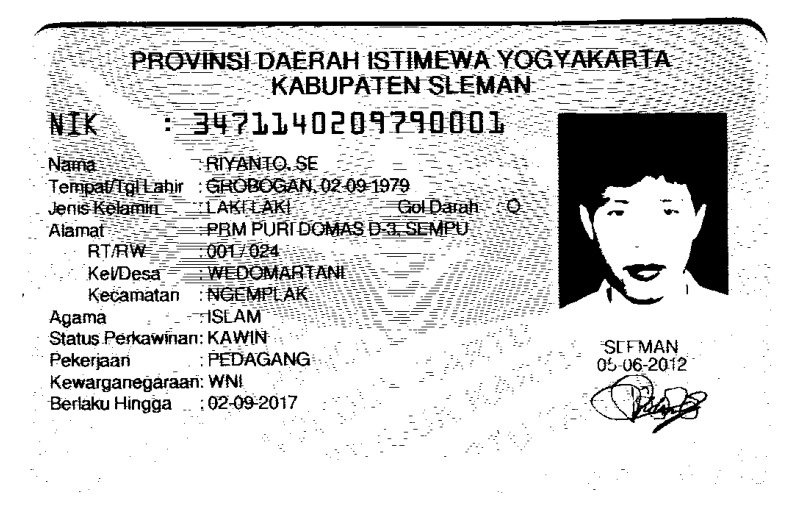

In [ ]:
ktp = cv.imread('/content/drive/MyDrive/Images/KTP_More/ktp.png')

# Filtering
blurred = cv.GaussianBlur(ktp, (5, 5), 0.5)

# Mengubah ke grayscale
gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)

# Melakukan thresholding
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)


plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(bw, cv.COLOR_BGR2RGB)), plt.axis('off')
plt.show()

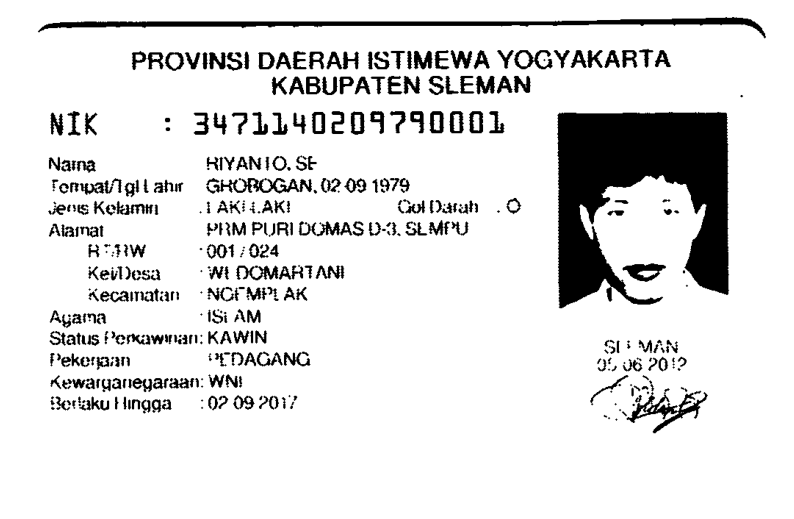

In [ ]:
kernel = cv.getStructuringElement(cv.MORPH_CROSS, (3,3))

# Operasi pembukaan (opening) untuk memperjelas batas antar objek
closed_img = cv.morphologyEx(bw, cv.MORPH_CLOSE, kernel)

plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(closed_img, cv.COLOR_BGR2RGB)), plt.axis('off')
plt.show()

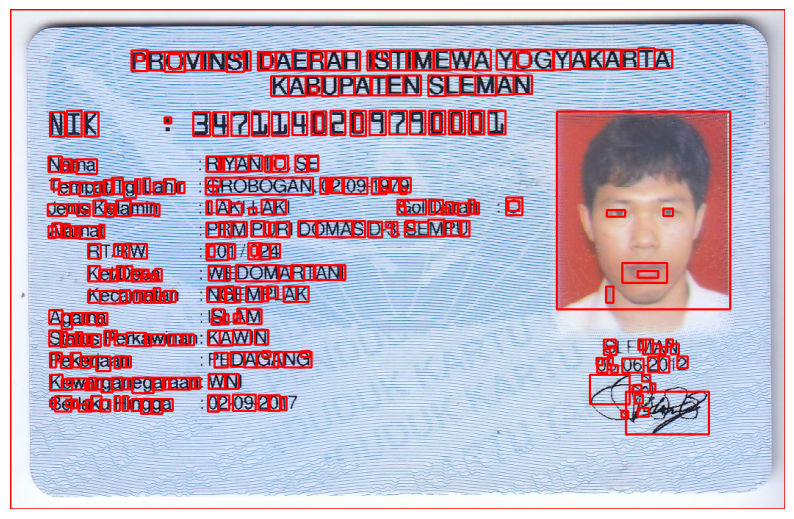

In [ ]:
img = closed_img.copy()
img_draw = ktp.copy()

contours, hierarchy = cv.findContours(img.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
        cv.rectangle(img_draw, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 8 and w >= 8 and float(ras) <= 10:
        cv.rectangle(img_draw, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 10 and w >= 7 and float(ras) <= 8:
        cv.rectangle(img_draw, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)

plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(img_draw, cv.COLOR_BGR2RGB)), plt.axis('off')
plt.show()

In [ ]:
print(contours)

(array([[[0, 0]],

       [[0, 1]],

       [[0, 2]],

       ...,

       [[3, 0]],

       [[2, 0]],

       [[1, 0]]], dtype=int32), array([[[824, 557]],

       [[825, 556]],

       [[826, 557]],

       [[827, 558]],

       [[826, 559]],

       [[825, 560]],

       [[824, 559]],

       [[823, 558]]], dtype=int32), array([[[814, 555]],

       [[815, 554]],

       [[816, 555]],

       [[817, 556]],

       [[816, 557]],

       [[815, 558]],

       [[814, 557]],

       [[813, 556]]], dtype=int32), array([[[808, 552]],

       [[809, 551]],

       [[810, 552]],

       [[811, 552]],

       [[812, 553]],

       [[813, 554]],

       [[812, 555]],

       [[811, 556]],

       [[810, 555]],

       [[809, 555]],

       [[808, 554]],

       [[807, 553]]], dtype=int32), array([[[833, 547]],

       [[834, 546]],

       [[835, 547]],

       [[836, 548]],

       [[837, 549]],

       [[838, 550]],

       [[839, 551]],

       [[840, 552]],

       [[839, 553]],

       [